In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [5]:
df = pd.read_csv('summary.csv', encoding='ISO-8859-1')

In [6]:
# Update the 'Country' column where 'Country_Code' is 'ROC'

df.loc[df['Country_Code'] == 'ROC', 'Country'] = 'Russia'

# Verify the update
print(df[df['Country_Code'] == 'ROC'])

     Year Country  Total_Medals  Gold_Medals  Silver_Medals  Bronze_Medals  \
539  2020  Russia            71           20             28             23   

     Total_Athletes  Events_Count  Host_or_Not Country_Code  population_total  \
539             318           204            0          ROC         145245148   

     population_growth  GNI_per_capita           GDP  GDP_growth  \
539          -0.143202           10660  1.493080e+12   -2.653655   

                      Region  GDP_per_capita  Population_Percentage  \
539  Europe and Central Asia     10108.32715               0.018664   

     GDP_Percentage    HDI  
539        0.017661  0.824  


In [7]:
df2 = df.copy()

In [8]:
df2

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,population_total,population_growth,GNI_per_capita,GDP,GDP_growth,Region,GDP_per_capita,Population_Percentage,GDP_Percentage,HDI
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,26427200,2.002330,370,1.010930e+10,3.924980,South Asia,382.534000,0.003906,0.000159,0.437
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,30466500,4.077630,640,1.990730e+10,12.752300,South Asia,653.417000,0.004288,0.000265,0.482
2,1992,Algeria,2,1,0,1,35,27,0,ALG,26748300,2.323750,1920,4.800310e+10,1.800000,Middle East and North Africa,1794.620000,0.004918,0.001912,0.587
3,1996,Algeria,3,2,0,1,45,29,0,ALG,28984600,1.763320,1530,4.694160e+10,4.100000,Middle East and North Africa,1619.530000,0.005015,0.001489,0.608
4,2000,Algeria,5,1,1,3,47,42,0,ALG,30774600,1.402290,1610,5.479040e+10,3.800000,Middle East and North Africa,1780.380000,0.005036,0.001637,0.644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,32180401,2.066269,2230,7.004310e+10,0.513942,Sub-Saharan Africa,2176.576218,0.004135,0.000829,0.611
622,2020,Grenada,1,0,0,1,6,2,0,GRD,123663,0.762219,7890,1.043411e+09,-13.756622,Latin America and Caribbean,8437.536782,0.000016,0.000012,0.779
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,4360444,-1.832821,32790,1.075130e+11,-5.274021,Middle East and North Africa,24656.433710,0.000560,0.001272,0.806
624,2020,Moldova,1,0,0,1,19,16,0,MDA,2635130,-1.098032,4360,1.153075e+10,-8.275978,Europe and Central Asia,4375.778893,0.000339,0.000136,0.769


## Principal Component Analysis

##### perform PCA on two sets of features:

* GDP and GDP_Percentage
* population_total and population_percentage

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [12]:
# Select GDP-related features
gdp_features = ['GDP', 'GDP_Percentage']
X_gdp = df2[gdp_features]

# Standardize the features
scaler = StandardScaler()
X_gdp_scaled = scaler.fit_transform(X_gdp)


In [13]:
# Select population-related features
population_features = ['population_total', 'Population_Percentage']
X_population = df2[population_features]

# Standardize the features
X_population_scaled = scaler.fit_transform(X_population)


In [14]:
# Apply PCA to reduce GDP features to 1 component
pca_gdp = PCA(n_components=1)
X_gdp_pca = pca_gdp.fit_transform(X_gdp_scaled)

# Add the principal component to the DataFrame
df2['GDP_PCA'] = X_gdp_pca


In [15]:
# Apply PCA to reduce population features to 1 component
pca_population = PCA(n_components=1)
X_population_pca = pca_population.fit_transform(X_population_scaled)

# Add the principal component to the DataFrame
df2['population_PCA'] = X_population_pca


In [ ]:
# Drop the original GDP and population features
# df2 = df2.drop(columns=['GDP', 'GDP_Percentage', 'population_total', 'population_percentage'])


In [16]:
# Check the explained variance for the GDP PCA
print(pca_gdp.explained_variance_ratio_)



[0.95554912]


In [17]:
# Check the explained variance for the population PCA
print(pca_population.explained_variance_ratio_)


[0.99654789]


### PCA for GNI_per_capita and GDP_per_capita as income_PCA

In [21]:
# Select GNI_per_capita and GDP_per_capita
income_features = ['GNI_per_capita', 'GDP_per_capita']
X_income = df2[income_features]

# Standardize the features
scaler = StandardScaler()
X_income_scaled = scaler.fit_transform(X_income)

# Apply PCA to reduce to 1 component
pca_income = PCA(n_components=1)
X_income_pca = pca_income.fit_transform(X_income_scaled)

# Add the principal component to the DataFrame
df2['income_PCA'] = X_income_pca

# Drop the original correlated features
# df2 = df2.drop(columns=['GNI_per_capita', 'GDP_per_capita'])

# Check the explained variance
print(pca_income.explained_variance_ratio_)


[0.99143552]


### PCA for Events_Count and Total_Athletes as athletes_PCA

In [23]:
# Select Events_Count and Total_Athletes
athletes_features = ['Events_Count', 'Total_Athletes']
X_athletes = df2[athletes_features]

# Standardize the features
scaler = StandardScaler()
X_athletes_scaled = scaler.fit_transform(X_athletes)

# Apply PCA to reduce to 1 component
pca_athletes = PCA(n_components=1)
X_athletes_pca = pca_athletes.fit_transform(X_athletes_scaled)

# Add the principal component to the DataFrame
df2['athletes_PCA'] = X_athletes_pca

# Drop the original correlated features
# df2 = df2.drop(columns=['Events_Count', 'Total_Athletes'])

# Check the explained variance
print(pca_athletes.explained_variance_ratio_)


[0.98201234]


In [24]:
df2

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,...,GDP_growth,Region,GDP_per_capita,Population_Percentage,GDP_Percentage,HDI,GDP_PCA,population_PCA,income_PCA,athletes_PCA
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,...,3.924980,South Asia,382.534000,0.003906,0.000159,0.437,-0.484561,-0.286233,-1.237388,-1.416809
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,...,12.752300,South Asia,653.417000,0.004288,0.000265,0.482,-0.478765,-0.262288,-1.216370,-1.382949
2,1992,Algeria,2,1,0,1,35,27,0,ALG,...,1.800000,Middle East and North Africa,1794.620000,0.004918,0.001912,0.587,-0.434253,-0.260524,-1.122219,-0.982663
3,1996,Algeria,3,2,0,1,45,29,0,ALG,...,4.100000,Middle East and North Africa,1619.530000,0.005015,0.001489,0.608,-0.443431,-0.250034,-1.144281,-0.904040
4,2000,Algeria,5,1,1,3,47,42,0,ALG,...,3.800000,Middle East and North Africa,1780.380000,0.005036,0.001637,0.644,-0.437493,-0.243021,-1.134961,-0.745505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,...,0.513942,Sub-Saharan Africa,2176.576218,0.004135,0.000829,0.611,-0.448708,-0.259768,-1.095365,-1.338185
622,2020,Grenada,1,0,0,1,6,2,0,GRD,...,-13.756622,Latin America and Caribbean,8437.536782,0.000016,0.000012,0.779,-0.490925,-0.476145,-0.632423,-1.428286
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,...,-5.274021,Middle East and North Africa,24656.433710,0.000560,0.001272,0.806,-0.425783,-0.447548,0.969566,-1.383236
624,2020,Moldova,1,0,0,1,19,16,0,MDA,...,-8.275978,Europe and Central Asia,4375.778893,0.000339,0.000136,0.769,-0.484508,-0.459193,-0.927172,-1.196867


### Z- Score Normalization population_growth, GDP_growth, and HDI

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df2 is already loaded and contains 'population_growth', 'GDP_growth', and 'HDI' columns
columns_to_normalize = ['population_growth', 'GDP_growth', 'HDI']

# Initialize the scaler
scaler = StandardScaler()

# Perform Z-score normalization
df2_normalized = pd.DataFrame(scaler.fit_transform(df2[columns_to_normalize]), 
                              columns=[f'{col}_zscore' for col in columns_to_normalize])

# Add the normalized columns to df2
df2 = pd.concat([df2, df2_normalized], axis=1)

# Display the updated df2
print(df2.head())


   Year      Country  Total_Medals  Gold_Medals  Silver_Medals  Bronze_Medals  \
0  2008  Afghanistan             1            0              0              1   
1  2012  Afghanistan             1            0              0              1   
2  1992      Algeria             2            1              0              1   
3  1996      Algeria             3            2              0              1   
4  2000      Algeria             5            1              1              3   

   Total_Athletes  Events_Count  Host_or_Not Country_Code  ...  \
0               4             4            0          AFG  ...   
1               6             6            0          AFG  ...   
2              35            27            0          ALG  ...   
3              45            29            0          ALG  ...   
4              47            42            0          ALG  ...   

   Population_Percentage  GDP_Percentage    HDI   GDP_PCA  population_PCA  \
0               0.003906        0.00015

#### get distinct regions

In [27]:
# Get distinct values in the 'Region' column
distinct_regions = df2['Region'].unique()

# Convert to a list if needed
distinct_regions_list = distinct_regions.tolist()

# Display the distinct regions
print(distinct_regions_list)


['South Asia', 'Middle East and North Africa', 'Latin America and Caribbean', 'Europe and Central Asia', 'East Asia and Pacific', 'Sub-Saharan Africa', 'North America']


### Region - One Hot encoded 

In [28]:


# Perform one-hot encoding on the 'Region' column and drop the first dummy variable
df2_encoded = pd.get_dummies(df2, columns=['Region'], prefix='Region', drop_first=True)

# Display the updated df2 with one-hot encoded regions
print(df2_encoded.head())



   Year      Country  Total_Medals  Gold_Medals  Silver_Medals  Bronze_Medals  \
0  2008  Afghanistan             1            0              0              1   
1  2012  Afghanistan             1            0              0              1   
2  1992      Algeria             2            1              0              1   
3  1996      Algeria             3            2              0              1   
4  2000      Algeria             5            1              1              3   

   Total_Athletes  Events_Count  Host_or_Not Country_Code  ...  athletes_PCA  \
0               4             4            0          AFG  ...     -1.416809   
1               6             6            0          AFG  ...     -1.382949   
2              35            27            0          ALG  ...     -0.982663   
3              45            29            0          ALG  ...     -0.904040   
4              47            42            0          ALG  ...     -0.745505   

   population_growth_zscore  GDP

In [29]:
df2

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,...,Population_Percentage,GDP_Percentage,HDI,GDP_PCA,population_PCA,income_PCA,athletes_PCA,population_growth_zscore,GDP_growth_zscore,HDI_zscore
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,...,0.003906,0.000159,0.437,-0.484561,-0.286233,-1.237388,-1.416809,0.932791,0.334188,-2.382543
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,...,0.004288,0.000265,0.482,-0.478765,-0.262288,-1.216370,-1.382949,2.676930,2.167613,-2.043928
2,1992,Algeria,2,1,0,1,35,27,0,ALG,...,0.004918,0.001912,0.587,-0.434253,-0.260524,-1.122219,-0.982663,1.202921,-0.107168,-1.253826
3,1996,Algeria,3,2,0,1,45,29,0,ALG,...,0.005015,0.001489,0.608,-0.443431,-0.250034,-1.144281,-0.904040,0.731920,0.370539,-1.095805
4,2000,Algeria,5,1,1,3,47,42,0,ALG,...,0.005036,0.001637,0.644,-0.437493,-0.243021,-1.134961,-0.745505,0.428501,0.308230,-0.824913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,...,0.004135,0.000829,0.611,-0.448708,-0.259768,-1.095365,-1.338185,0.986527,-0.374281,-1.073231
622,2020,Grenada,1,0,0,1,6,2,0,GRD,...,0.000016,0.000012,0.779,-0.490925,-0.476145,-0.632423,-1.428286,-0.109432,-3.338263,0.190932
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,...,0.000560,0.001272,0.806,-0.425783,-0.447548,0.969566,-1.383236,-2.290375,-1.576435,0.394101
624,2020,Moldova,1,0,0,1,19,16,0,MDA,...,0.000339,0.000136,0.769,-0.484508,-0.459193,-0.927172,-1.196867,-1.672838,-2.199939,0.115684


In [34]:
## get duplicate
df3 = df2_encoded.copy()

In [35]:
df3

,Year,Country,Total_Medals,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Athletes,Events_Count,Host_or_Not,Country_Code,...,athletes_PCA,population_growth_zscore,GDP_growth_zscore,HDI_zscore,Region_Europe and Central Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,2008,Afghanistan,1,0,0,1,4,4,0,AFG,...,-1.416809,0.932791,0.334188,-2.382543,0,0,0,0,1,0
1,2012,Afghanistan,1,0,0,1,6,6,0,AFG,...,-1.382949,2.676930,2.167613,-2.043928,0,0,0,0,1,0
2,1992,Algeria,2,1,0,1,35,27,0,ALG,...,-0.982663,1.202921,-0.107168,-1.253826,0,0,1,0,0,0
3,1996,Algeria,3,2,0,1,45,29,0,ALG,...,-0.904040,0.731920,0.370539,-1.095805,0,0,1,0,0,0
4,2000,Algeria,5,1,1,3,47,42,0,ALG,...,-0.745505,0.428501,0.308230,-0.824913,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,0,1,14,6,0,GHA,...,-1.338185,0.986527,-0.374281,-1.073231,0,0,0,0,0,1
622,2020,Grenada,1,0,0,1,6,2,0,GRD,...,-1.428286,-0.109432,-3.338263,0.190932,0,1,0,0,0,0
623,2020,Kuwait,1,0,0,1,10,4,0,KWT,...,-1.383236,-2.290375,-1.576435,0.394101,0,0,1,0,0,0
624,2020,Moldova,1,0,0,1,19,16,0,MDA,...,-1.196867,-1.672838,-2.199939,0.115684,1,0,0,0,0,0


### now we can remove unnesssary columns 

In [1]:
df3 = df3.drop(columns=['GDP', 'GDP_Percentage', 'population_total', 'Population_Percentage'])
df3 = df3.drop(columns=['Total_Athletes', 'Events_Count', 'HDI', 'Gold_Medals','Silver_Medals',
                       'Bronze_Medals'])



NameError: name 'df3' is not defined

In [ ]:
print(df3.head())

In [41]:
df3 = df3.drop(columns=['GNI_per_capita','GDP_growth','GDP_per_capita',
                       'population_growth'])

In [42]:
print(df3.head())

   Year      Country  Total_Medals  Host_or_Not Country_Code   GDP_PCA  \
0  2008  Afghanistan             1            0          AFG -0.484561   
1  2012  Afghanistan             1            0          AFG -0.478765   
2  1992      Algeria             2            0          ALG -0.434253   
3  1996      Algeria             3            0          ALG -0.443431   
4  2000      Algeria             5            0          ALG -0.437493   

   population_PCA  income_PCA  athletes_PCA  population_growth_zscore  \
0       -0.286233   -1.237388     -1.416809                  0.932791   
1       -0.262288   -1.216370     -1.382949                  2.676930   
2       -0.260524   -1.122219     -0.982663                  1.202921   
3       -0.250034   -1.144281     -0.904040                  0.731920   
4       -0.243021   -1.134961     -0.745505                  0.428501   

   GDP_growth_zscore  HDI_zscore  Region_Europe and Central Asia  \
0           0.334188   -2.382543                

In [43]:
column_names = df3.columns.tolist()
print(column_names)

['Year', 'Country', 'Total_Medals', 'Host_or_Not', 'Country_Code', 'GDP_PCA', 'population_PCA', 'income_PCA', 'athletes_PCA', 'population_growth_zscore', 'GDP_growth_zscore', 'HDI_zscore', 'Region_Europe and Central Asia', 'Region_Latin America and Caribbean', 'Region_Middle East and North Africa', 'Region_North America', 'Region_South Asia', 'Region_Sub-Saharan Africa']


## ML Model 
### ( without Normalize target value )

### Split the Data

In [95]:
# Create training and testing sets
train_data = df3[(df3['Year'] >= 1992) & (df3['Year'] <= 2016)]
test_data = df3[df3['Year'] == 2020]


### Train the Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression


# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country','Country_Code'])
y_train = train_data['Total_Medals']

# Initialize and train the model
#model = RandomForestRegressor(random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

###  Make Predictions

In [97]:
# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country','Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers


### Create Final DataFrame

In [98]:
# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]

# Display the final output
print(final_output)


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                91            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\908890126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


In [99]:
print(final_output.head(20))


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                91            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
540       Australia                36            46
541     Netherlands                18            36
542          France                35            33
543         Germany                40            37
544           Italy                31            40
545          Canada                28            24
546          Brazil                25            21
547     New Zealand                 9            20
548            Cuba                 1            15
549         Hungary                 9            20
550     South Korea                18            20
551          Poland                16            14
552  Czech Republic                 4            11
553         

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions for the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate R-squared and Adjusted R-squared for the test set
r_squared_test = r2_score(y_test_actual, test_predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, test_predictions))

# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, train_predictions)



### Calculate R-squared and Adjusted R-squared

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared for the test set
r_squared_test = r2_score(y_test_actual, y_test_predicted)

# Calculate Adjusted R-squared for the test set
n = len(y_test_actual)  # Number of observations in the test set
p = X_test.shape[1]     # Number of predictors (features)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (n - 1) / (n - p - 1)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Calculate Adjusted R-squared for the training set
n_train = len(y_train)  # Number of observations in the training set
adjusted_r_squared_train = 1 - (1 - train_r_squared) * (n_train - 1) / (n_train - X_train.shape[1] - 1)


### Calculate Standard Error

In [102]:
# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, test_predictions))


### Calculate MSE for the Training Set

In [103]:
# Calculate MSE for the training set
train_mse = mean_squared_error(y_train, train_predictions)


In [104]:
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


Test Set Multiple R: 0.9283165192587096
Test Set R-squared (R²): 0.8617715599286062
Test Set Adjusted R-squared: 0.8363084262312441
Test Set Standard Error: 7.757783908336948
Training Set Mean Squared Error (MSE): 55.614002623686325


###  Get the Intercept and Coefficients

In [105]:
# Get the intercept
intercept = model.intercept_

# Get the coefficients
coefficients = model.coef_

# Display the intercept and coefficients along with their corresponding feature names
feature_names = X_train.columns  # Get the feature names if X_train is a DataFrame

# Create a DataFrame for coefficients and intercept
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.append({'Feature': 'Intercept', 'Coefficient': intercept}, ignore_index=True)

print(coef_df)



                                Feature  Coefficient
0                           Host_or_Not    -2.703590
1                               GDP_PCA     4.926365
2                        population_PCA     1.473096
3                            income_PCA    -0.341205
4                          athletes_PCA     8.629146
5              population_growth_zscore     0.357187
6                     GDP_growth_zscore     0.705840
7                            HDI_zscore    -1.658965
8        Region_Europe and Central Asia     1.155721
9    Region_Latin America and Caribbean    -0.386662
10  Region_Middle East and North Africa    -0.018519
11                 Region_North America    -1.411189
12                    Region_South Asia   -12.970538
13            Region_Sub-Saharan Africa    -0.437327
14                            Intercept    10.864706


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\1155704717.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Feature': 'Intercept', 'Coefficient': intercept}, ignore_index=True)


### Plot Actual vs. Predicted Values

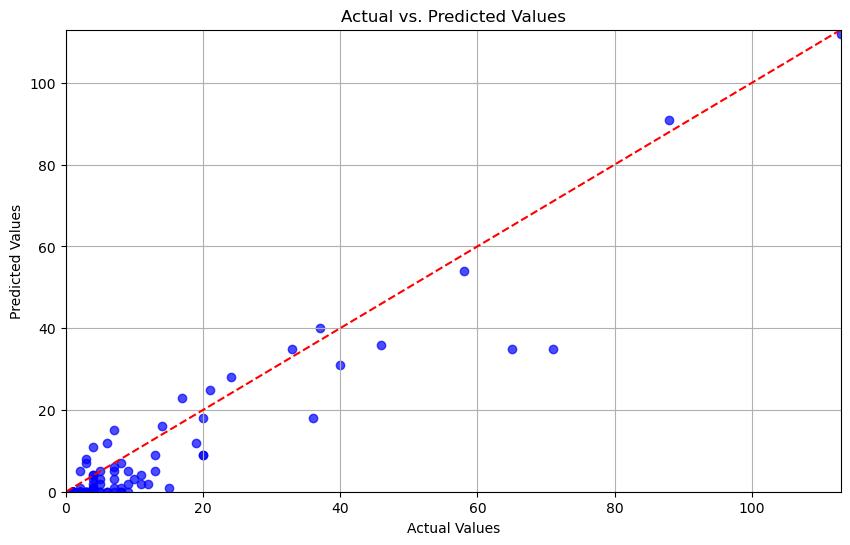

In [106]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_test_predicted, alpha=0.7, color='blue')
plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.xlim(0, max(y_test_actual))
plt.ylim(0, max(y_test_actual))
plt.grid()
plt.show()


In [179]:
df5

,Year,Country,Total_Medals,Host_or_Not,Country_Code,GDP_PCA,population_PCA,income_PCA,athletes_PCA,population_growth_zscore,GDP_growth_zscore,HDI_zscore,Region_Europe and Central Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,2008,Afghanistan,1,0,AFG,-0.484561,-0.286233,-1.237388,-1.416809,0.932791,0.334188,-2.382543,0,0,0,0,1,0
1,2012,Afghanistan,1,0,AFG,-0.478765,-0.262288,-1.216370,-1.382949,2.676930,2.167613,-2.043928,0,0,0,0,1,0
2,1992,Algeria,2,0,ALG,-0.434253,-0.260524,-1.122219,-0.982663,1.202921,-0.107168,-1.253826,0,0,1,0,0,0
3,1996,Algeria,3,0,ALG,-0.443431,-0.250034,-1.144281,-0.904040,0.731920,0.370539,-1.095805,0,0,1,0,0,0
4,2000,Algeria,5,0,ALG,-0.437493,-0.243021,-1.134961,-0.745505,0.428501,0.308230,-0.824913,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,GHA,-0.448708,-0.259768,-1.095365,-1.338185,0.986527,-0.374281,-1.073231,0,0,0,0,0,1
622,2020,Grenada,1,0,GRD,-0.490925,-0.476145,-0.632423,-1.428286,-0.109432,-3.338263,0.190932,0,1,0,0,0,0
623,2020,Kuwait,1,0,KWT,-0.425783,-0.447548,0.969566,-1.383236,-2.290375,-1.576435,0.394101,0,0,1,0,0,0
624,2020,Moldova,1,0,MDA,-0.484508,-0.459193,-0.927172,-1.196867,-1.672838,-2.199939,0.115684,1,0,0,0,0,0


In [181]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                91            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9283165192587096
Test Set R-squared (R²): 0.8617715599286062
Test Set Adjusted R-squared: 0.8363084262312441
Test Set Standard Error: 7.118309467164916
Training Set Mean Squared Error (MSE): 55.614002623686325


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\2036906669.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


## WEIGHTED LR

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  

# Define weights (for example, you can use Total_Athletes as weights)
weights = train_data['Total_Medals']  # You can choose any column as weights

# Initialize the Weighted Linear Regression model
weighted_lr_model = LinearRegression()

# Fit the model with sample weights
weighted_lr_model.fit(X_train, y_train, sample_weight=weights)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = weighted_lr_model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = weighted_lr_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


NameError: name 'df5' is not defined

In [ ]:
X_test.columns

## LASSO

In [186]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)  # You can adjust the alpha value for regularization strength

# Fit the model
lasso_model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = lasso_model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = lasso_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')



            Country  Predicted_Medals  Total_Medals
535   United States               107           113
536           China                81            88
537           Japan                56            58
538  United kingdom                36            65
539          Russia                34            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9335975233149689
Test Set R-squared (R²): 0.871604335539844
Test Set Adjusted R-squared: 0.8479525026129731
Test Set Standard Error: 6.860461651079617
Training Set Mean Squared Error (MSE): 61.16156825155838


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\130829785.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


## RIDGE

In [185]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)  # You can adjust the alpha value for regularization strength

# Fit the model
ridge_model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = ridge_model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = ridge_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                90            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9280096865952104
Test Set R-squared (R²): 0.8612019784145406
Test Set Adjusted R-squared: 0.8356339218066928
Test Set Standard Error: 7.132960176470977
Training Set Mean Squared Error (MSE): 55.652462882765185


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\4002545640.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions


## RANDOM FOREST

In [187]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df5 is your DataFrame containing all data

# Define train and test data based on the year
train_data = df5[(df5['Year'] >= 1992) & (df5['Year'] <= 2016)]
test_data = df5[df5['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals']  # Using original target variable without normalization

# Initialize the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators for more trees

# Fit the model
rf_model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Year', 'Country', 'Country_Code'])

# Make predictions
predictions = rf_model.predict(X_test)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')


            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                69            88
537           Japan                79            58
538  United kingdom                43            65
539          Russia                43            71
..              ...               ...           ...
621           Ghana                 1             1
622         Grenada                 2             1
623          Kuwait                 2             1
624         Moldova                 2             1
625           Syria                 1             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9446740442027878
Test Set R-squared (R²): 0.8924090497904507
Test Set Adjusted R-squared: 0.8725896642255336
Test Set Standard Error: 6.280092391005122
Training Set Mean Squared Error (MSE): 5.349440747663553


C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\2362498034.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions



## ML Model 
### ( Target Value Z-Score Scalled )

            Country  Predicted_Medals  Total_Medals
535   United States               112           113
536           China                91            88
537           Japan                54            58
538  United kingdom                35            65
539          Russia                35            71
..              ...               ...           ...
621           Ghana                 0             1
622         Grenada                 0             1
623          Kuwait                 0             1
624         Moldova                 0             1
625           Syria                 0             1

[91 rows x 3 columns]
Test Set Multiple R: 0.9283165192587096
Test Set R-squared (R²): 0.8617715599286062
Test Set Adjusted R-squared: 0.8363084262312441
Test Set Standard Error: 7.118309467164916
Training Set Mean Squared Error (MSE): 0.16008320889128913
                                Feature  Coefficient
0                           Host_or_Not    -0.145051
1            

C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\2323136404.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Medals'] = predictions
C:\Users\Asus\AppData\Local\Temp\ipykernel_27780\2323136404.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Feature': 'Intercept', 'Coefficient': intercept}, ignore_index=True)


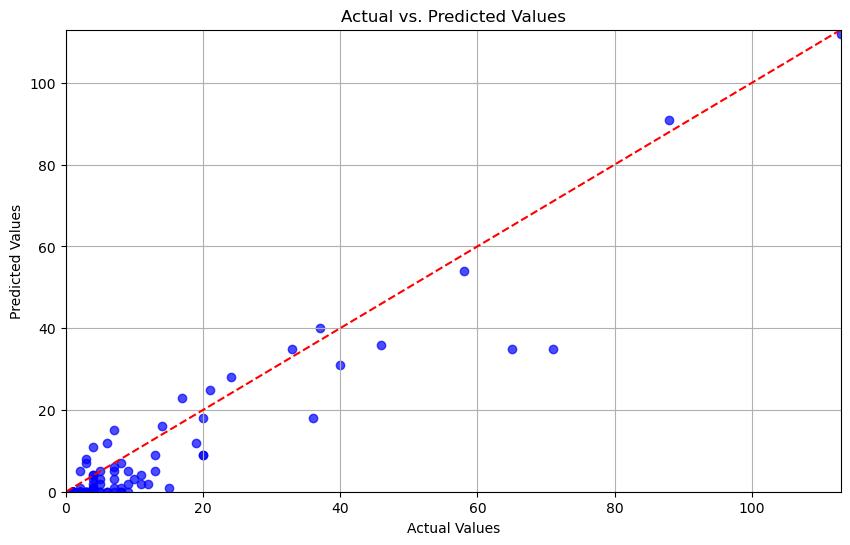

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Assuming df3 is your DataFrame containing all data

# Z-score normalization of the target variable
df3['Total_Medals_Z'] = zscore(df3['Total_Medals'])

# Define train and test data based on the year
train_data = df3[(df3['Year'] >= 1992) & (df3['Year'] <= 2016)]
test_data = df3[df3['Year'] == 2020]

# Define features and target variable for training
X_train = train_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])
y_train = train_data['Total_Medals_Z']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Define features for testing
X_test = test_data.drop(columns=['Total_Medals', 'Total_Medals_Z', 'Year', 'Country', 'Country_Code'])

# Make predictions
test_predictions_z = model.predict(X_test)

# Convert predictions back to original scale using the mean and std from the training data
mean_total_medals = train_data['Total_Medals'].mean()
std_total_medals = train_data['Total_Medals'].std()
predictions = mean_total_medals + (test_predictions_z * std_total_medals)

# Ensure predictions are non-negative integers
predictions = np.maximum(predictions, 0)  # Set minimum value to 0
predictions = predictions.astype(int)      # Convert to integers

# Add predictions to the test_data DataFrame
test_data['Predicted_Medals'] = predictions

# Select relevant columns for final output
final_output = test_data[['Country', 'Predicted_Medals', 'Total_Medals']]
print(final_output)

# Calculate R-squared and Adjusted R-squared for the test set
y_test_actual = test_data['Total_Medals']
r_squared_test = r2_score(y_test_actual, predictions)
adjusted_r_squared_test = 1 - (1 - r_squared_test) * (len(y_test_actual) - 1) / (len(y_test_actual) - X_test.shape[1] - 1)

# Calculate Standard Error for the test set
standard_error_test = np.sqrt(mean_squared_error(y_test_actual, predictions))

# Calculate MSE for the training set
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate R-squared for the training set
train_r_squared = r2_score(y_train, train_predictions)

# Print performance metrics
print(f'Test Set Multiple R: {np.sqrt(r_squared_test)}')  # R is the square root of R²
print(f'Test Set R-squared (R²): {r_squared_test}')
print(f'Test Set Adjusted R-squared: {adjusted_r_squared_test}')
print(f'Test Set Standard Error: {standard_error_test}')
print(f'Training Set Mean Squared Error (MSE): {train_mse}')

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Display the intercept and coefficients along with their corresponding feature names
feature_names = X_train.columns  # Get the feature names if X_train is a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.append({'Feature': 'Intercept', 'Coefficient': intercept}, ignore_index=True)

print(coef_df)

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions, alpha=0.7, color='blue')
plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], color='red', linestyle='--')  # Line of equality
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.xlim(0, max(y_test_actual))
plt.ylim(0, max(y_test_actual))
plt.grid()
plt.show()


,Year,Country,Total_Medals,Host_or_Not,Country_Code,GDP_PCA,population_PCA,income_PCA,athletes_PCA,population_growth_zscore,GDP_growth_zscore,HDI_zscore,Region_Europe and Central Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,2008,Afghanistan,1,0,AFG,-0.484561,-0.286233,-1.237388,-1.416809,0.932791,0.334188,-2.382543,0,0,0,0,1,0
1,2012,Afghanistan,1,0,AFG,-0.478765,-0.262288,-1.216370,-1.382949,2.676930,2.167613,-2.043928,0,0,0,0,1,0
2,1992,Algeria,2,0,ALG,-0.434253,-0.260524,-1.122219,-0.982663,1.202921,-0.107168,-1.253826,0,0,1,0,0,0
3,1996,Algeria,3,0,ALG,-0.443431,-0.250034,-1.144281,-0.904040,0.731920,0.370539,-1.095805,0,0,1,0,0,0
4,2000,Algeria,5,0,ALG,-0.437493,-0.243021,-1.134961,-0.745505,0.428501,0.308230,-0.824913,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020,Ghana,1,0,GHA,-0.448708,-0.259768,-1.095365,-1.338185,0.986527,-0.374281,-1.073231,0,0,0,0,0,1
622,2020,Grenada,1,0,GRD,-0.490925,-0.476145,-0.632423,-1.428286,-0.109432,-3.338263,0.190932,0,1,0,0,0,0
623,2020,Kuwait,1,0,KWT,-0.425783,-0.447548,0.969566,-1.383236,-2.290375,-1.576435,0.394101,0,0,1,0,0,0
624,2020,Moldova,1,0,MDA,-0.484508,-0.459193,-0.927172,-1.196867,-1.672838,-2.199939,0.115684,1,0,0,0,0,0


### save this df5

In [156]:
df5.to_csv('df5.csv', index=False)